# Effects of Loan Features on Interest Rates - Part One

> This project primarily focuses on exploring data and communicating insights using python's matplolib and seaborn libraries. The dataset is from a peer-to-peer lending startup called Prosper. It consists of 113,937 loans and has 81 variables on each loan including the borrower's income, the type of loan and the loan amount.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset and show all the columns in the dataframe
df = pd.read_csv('prosperLoanData.csv', index_col = False)
pd.set_option('display.max_columns', None)

In [3]:
# high-level overview of data shape and composition
print(df.dtypes)
print(df.shape)
df.head()

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# convert dates to datetime object
df[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']] = df[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

In [5]:
# convert string variables to categorical type
cat_vars = ['BorrowerState','IncomeVerifiable','ListingCategory (numeric)', 'LoanStatus']
for var in cat_vars:
    df[var] = df[var].astype('category')

In [6]:
# drop any duplicated loan entries
df.drop_duplicates(inplace = True)

In [7]:
# keep loan data with an orgination date of July 2009 or after, as some variables of interest such as Prosper Score are measured differently while data on other variables such as EstimatedEffectiveYield are not available before this time
df = df.loc[df['LoanOriginationDate'] > '2009-07-01 00:00:00']

In [8]:
# shape and composition of revised dateset
print(df.dtypes)
print(df.shape)
df.head()

ListingKey                             object
ListingNumber                           int64
ListingCreationDate            datetime64[ns]
CreditGrade                            object
Term                                    int64
                                    ...      
PercentFunded                         float64
Recommendations                         int64
InvestmentFromFriendsCount              int64
InvestmentFromFriendsAmount           float64
Investors                               int64
Length: 81, dtype: object
(84984, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-09-20,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaT,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,False,NaN,2013-12-14 08:26:40,740.0,759.0,1973-03-01,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123257,15000,2013-12-24,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaT,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,False,NaN,2013-04-12 09:52:53,680.0,699.0,2000-09-29,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0

### What is the structure of your dataset?

There revised dataset consists of 84,984 loans with 81 features. Most of the variables in the dataset are quantitative. Amongst these, ProsperScore is a discrete variable between 1 to 11. I've converted LoanStatus, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, LoanOriginationQuarter and IncomeVerifiable to categorical type and the dates to datetime objects for further exploration.

### What is/are the main feature(s) of interest in your dataset?

I want to look at the factors that affect the interest rate offered by Prosper.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe having a high income, a good prosper score and a low amount of existing debt will allow borrowers to secure a reduced interest rate. The interest rate will also vary depending on the type of loan and should be lower for borrowers who have good credit. The variables below look promising,
   
   quant_vars  = ['BorrowerAPR','BorrowerRate','EstimatedEffectiveYield','ProsperScore','StatedMonthlyIncome','DebtToIncomeRatio','BankcardUtilization','RevolvingCreditBalance','CreditScoreRangeLower','AmountDelinquent','LoanOriginalAmount','Term','TotalProsperLoans']   
 
   cat_vars = ['BorrowerState','IncomeVerifiable','ListingCategory (numeric)', 'LoanStatus']

## Univariate Exploration

In [9]:
# descriptive stats for quant variables of interest
df[['BorrowerAPR','BorrowerRate','EstimatedEffectiveYield','ProsperScore','StatedMonthlyIncome','DebtToIncomeRatio','BankcardUtilization','RevolvingCreditBalance','CreditScoreRangeLower','AmountDelinquent','LoanOriginalAmount','Term','TotalProsperLoans']].describe()

,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperScore,StatedMonthlyIncome,DebtToIncomeRatio,BankcardUtilization,RevolvingCreditBalance,CreditScoreRangeLower,AmountDelinquent,LoanOriginalAmount,Term,TotalProsperLoans
count,84984.000000,84984.000000,84853.000000,84853.000000,8.498400e+04,77677.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,19856.000000
mean,0.226597,0.195971,0.168661,5.950067,5.929911e+03,0.258738,0.564047,17931.141285,699.408359,949.976678,9075.893403,42.475854,1.459760
std,0.079947,0.074656,0.068467,2.376501,8.234505e+03,0.318694,0.301748,31349.186724,47.111880,7414.844118,6287.177834,11.634602,0.789756
min,0.045830,0.040000,-0.182700,1.000000,0.000000e+00,0.000000,0.000000,0.000000,600.000000,0.000000,1000.000000,12.000000,0.000000
25%,0.163240,0.135900,0.115670,4.000000,3.433333e+03,0.150000,0.330000,3822.000000,660.000000,0.000000,4000.000000,36.000000,1.000000
50%,0.219450,0.187500,0.161500,6.000000,5.000000e+03,0.220000,0.600000,9321.000000,700.000000,0.000000,7500.000000,36.000000,1.000000
75%,0.292540,0.257400,0.224300,8.000000,7.083333e+03,0.320000,0.830000,20334.000000,720.000000,0.000000,13500.000000,60.000000,2.000000
max,0.423950,0.360000,0.319900,11.000000,1.750003e+06,10.010000,2.500000,999165.000000,880.000000,463881.000000,35000.000000,60.000000,8.000000


In [10]:
# assign color palette for plots
color = sb.color_palette()[0]

I'll start by looking at the distribution of the primary variable, which is the interest rate. The two main types of rates are the BorrowerRate and the BorrowerAPR. The BorrowerRate is the overall interest rate on a loan considering the loan term, while the BorrowerAPR is the annualized rate. 

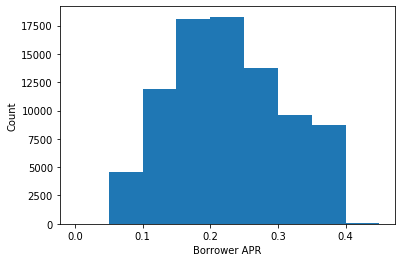

In [11]:
# plot BorrowerAPR on a standard histogram
binsize = 0.05
bins = np.arange(0, df['BorrowerAPR'].max() + binsize, binsize)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.show()

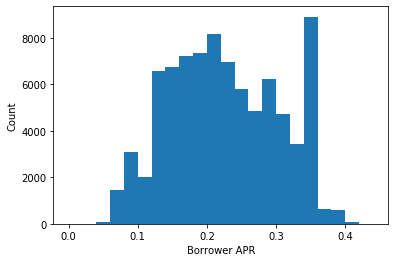

In [12]:
# reduce bin size to get a more detailed look
binsize = 0.02
bins = np.arange(0, df['BorrowerAPR'].max() + binsize, binsize)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.show()

For BorrowerAPR, the intial histogram shows more loans at higher interest rates, with a peak in the mid range. However when the bin size is reduced, the plot looks more bimodal with a clear second peak nearing the high end.

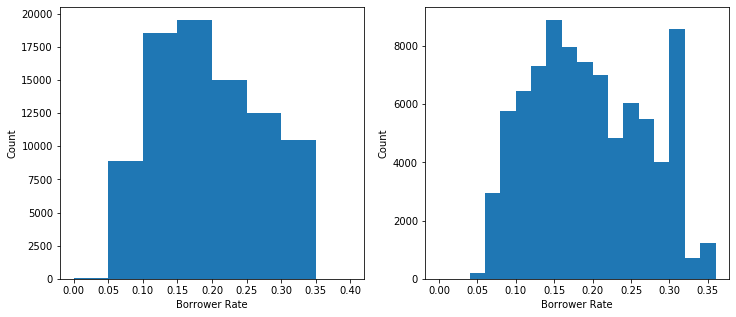

In [13]:
# plot BorrowerRate using subplots to get a side-by-side comparision
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
binsize = 0.05
bins = np.arange(0, df['BorrowerRate'].max() + binsize, binsize)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.subplot(1,2,2)
binsize = 0.02
bins = np.arange(0, df['BorrowerRate'].max() + binsize, binsize)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.show()

The plot for BorrowerRate moves in line with BorrowerAPR but the interest rate is less.

The EstimatedEffectiveYield is closely related to the interest rate. It's the estimated return that Prosper makes after accounting for servicing costs, uncollected interest and late fees.

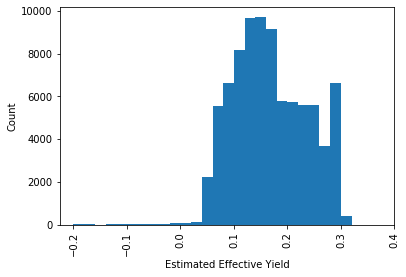

In [14]:
# plot EstimatedEffectiveYield
binsize = 0.02
bins = np.arange(-0.2, df['EstimatedEffectiveYield'].max()+binsize, binsize)
plt.hist(data = df, x = 'EstimatedEffectiveYield', bins = bins)
plt.xlabel('Estimated Effective Yield')
ticksize = 0.1
ticks = np.arange(-0.2, df['EstimatedEffectiveYield'].max()+ticksize, ticksize)
plt.xticks(ticks, rotation = 90)
plt.ylabel('Count')
plt.show()          

For EstimatedEffectiveYield, the second peak is less pronounced and the interest rate goes into the negative range. Prosper expects to earn a return of approximately 0.14 on the majority of its loans while loosing money on a very small proportion.

Next, I'll look at the other quantitative variables starting with ProsperScore. This score measures the risk rating of a loan and is a range between 1 to 11. Loans with a greater score are considered less risky.

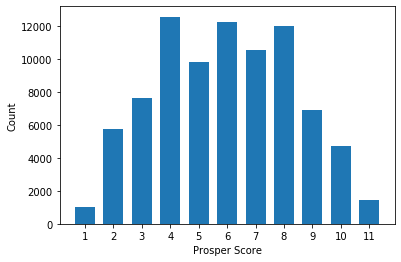

In [15]:
# plot ProsperScore using bin edges between integers and non-connected bins to emphasize the discrete natute of values
binsize = 1
bins = np.arange(0.5, df['ProsperScore'].max()+0.5+binsize, binsize)
plt.hist(data = df, x = 'ProsperScore', bins = bins, rwidth = 0.7)
plt.xticks(np.arange(1, df['ProsperScore'].max()+binsize, binsize))
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.show()

The distribution for ProsperScore is more normal compared to the interest rates. There aren't alot of loans that are considered very high or very low risk.

In [16]:
# descriptive stats for StatedMonthlyIncome shown without scientific notation
df['StatedMonthlyIncome'].describe().apply(lambda x: format(x, 'f'))

count      84984.000000
mean        5929.910916
std         8234.505182
min            0.000000
25%         3433.333333
50%         5000.000000
75%         7083.333333
max      1750002.916667
Name: StatedMonthlyIncome, dtype: object

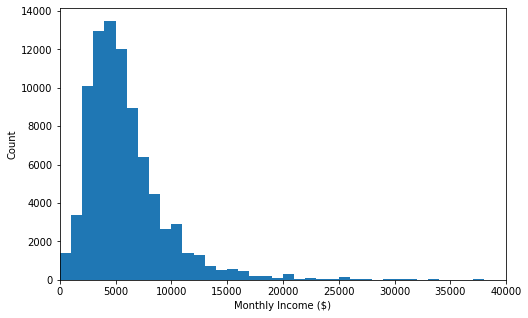

In [17]:
# plot StatedMonthlyIncome using axis limits to focus on the majority of the data
plt.figure(figsize = [8,5])
binsize = 1000
bins = np.arange(0, df['StatedMonthlyIncome'].max()+binsize, binsize)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim(0, 40000)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count')
plt.show()

In [18]:
np.percentile(df['StatedMonthlyIncome'], 95), df['StatedMonthlyIncome'].max()

(12500.0, 1750002.916667)

In [19]:
# check outlier
df[df['StatedMonthlyIncome'] == df['StatedMonthlyIncome'].max()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
53167,F9AD3540233111834F3D8A0,560783,2012-02-20 12:53:44.577,NaN,36,Current,NaT,0.35797,0.3177,0.3077,0.2896,0.165,0.1246,1.0,HR,4.0,3,OR,Professional,Self-employed,114.0,True,False,NaN,2012-02-20 12:53:40,740.0,759.0,1983-06-18,19.0,17.0,35.0,15,1988.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,42855.0,0.61,26168.0,33.0,1.0,0.0,NaN,"$100,000+",False,1.750003e+06,3D5836438779123523A2DA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,25,60925,4000,2012-02-24,Q1 2012,415B354030599221875E1CE,173.71,5867.39,3998.78,1868.61,-57.63,-59.06,0.0,0.0,0.0,1.0,0,0,0.0,2


In [20]:
# drop outlier
df.drop([53167], inplace = True)

The StatedMonthlyIncome has a long-tail distribution with most of the borrowers having a monthly income of under \\$15,000 and some borrowers beyond that. The maximum monthly income is \\$1,750,003, which is an outlier.

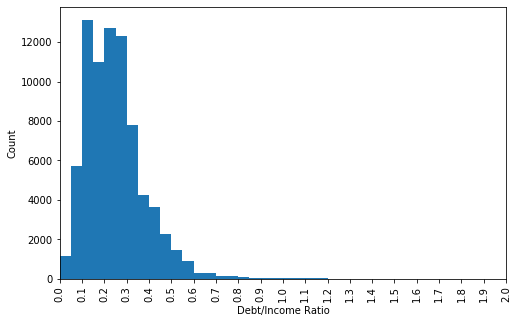

In [21]:
# plot DebtToIncomeRatio
plt.figure(figsize = [8,5])
binsize = 0.05
bins = np.arange(0, df.DebtToIncomeRatio.max()+ binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
ticksize = 0.1
plt.xticks(np.arange(0, df['DebtToIncomeRatio'].max()+ticksize, ticksize), rotation = 90)
plt.xlim(0,2)
plt.xlabel('Debt/Income Ratio')
plt.ylabel('Count')
plt.show()

The distribution for DebtToIncomeRatio is similar to StatedMonthtlyIncome with most borrowers having a ratio that is under half of their income.

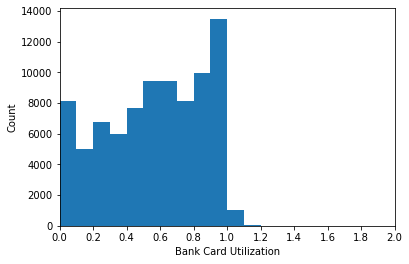

In [22]:
# plot BankCardUtilization
binsize = 0.1
bins = np.arange(0, df.BankcardUtilization.max()+ binsize, binsize)
plt.hist(data = df, x = 'BankcardUtilization', bins = bins)
plt.xticks(np.arange(0, 2+0.2, 0.2))
plt.xlim(0,2)
plt.xlabel('Bank Card Utilization')
plt.ylabel('Count')
plt.show()

The largest group of Prosper's borrowers are customers who have maxed out their bank cards.

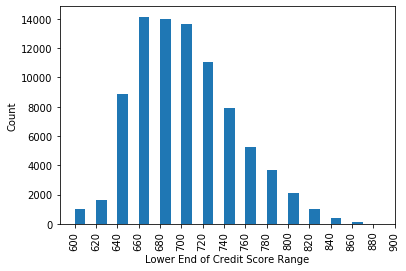

In [23]:
# plot CreditScoreRangeLower
binsize = 10
bins = np.arange(600, df['CreditScoreRangeLower'].max()+binsize, binsize)
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins)
ticksize = 20
ticks = np.arange(600, df['CreditScoreRangeLower'].max()+ticksize+20, ticksize)
plt.xticks(ticks, rotation = 90)
plt.xlabel('Lower End of Credit Score Range')
plt.ylabel('Count')
plt.show()

There aren't alot of borrowers with very low credit scores.

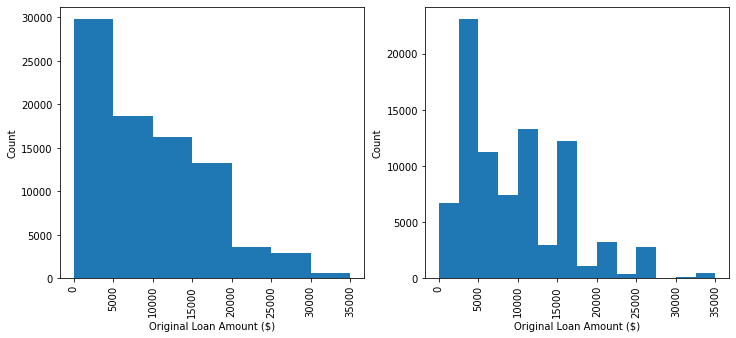

In [24]:
# plot LoanOriginalAmount
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
binsize = 5000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xticks(rotation = 90)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Count');

plt.subplot(1,2,2)
binsize = 2500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xticks(rotation = 90)
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Count')
plt.show()

There are more borrowers with smaller loan amounts. However, the small binsizes reveal large spikes in frequency. These amounts are most likely to be standard loan amounts offered by Prosper.

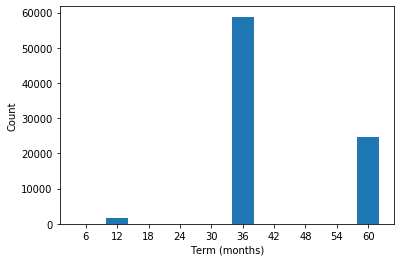

In [25]:
# plot Term
binsize = 6
bins = np.arange(3, df['Term'].max()+binsize+3, binsize)
plt.hist(data = df, x = 'Term', bins = bins, rwidth = 0.7)
plt.xlabel('Term (months)')
ticksize = 6
ticks = np.arange(6, df['Term'].max()+ticksize, ticksize)
plt.xticks(ticks)
plt.ylabel('Count')
plt.show()

Prosper loans have a term of one, three or five years.

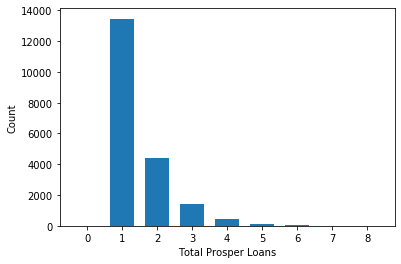

In [26]:
# plot TotalProsperLoans
binsize = 1
bins = np.arange(-0.5, df['TotalProsperLoans'].max()+binsize+0.5, binsize)
plt.hist(data = df, x = 'TotalProsperLoans', bins = bins, rwidth = 0.7)
plt.xlabel('Total Prosper Loans')
ticksize = 1
ticks = np.arange(0, df['TotalProsperLoans'].max()+ticksize, ticksize)
plt.xticks(ticks)
plt.ylabel('Count')
plt.show()

In [27]:
df[df['TotalProsperLoans'] == 0]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
105977,BF08350169110478827441B,486631,2010-12-02 20:22:23.610,NaN,36,Completed,2012-12-26,0.38723,0.35,0.34,0.1369,0.183,0.1369,1.0,HR,4.0,7,IL,Professional,Employed,33.0,False,False,NaN,2010-11-17 23:58:13,660.0,679.0,2001-03-01,11.0,10.0,20.0,3,82.0,4.0,10.0,0.0,0.0,16.0,0.0,0.0,2726.0,0.5,2674.0,18.0,0.44,1.0,0.1,"$25,000-49,999",True,3500.0,4AFC3607066833833454425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,39,45988,4000,2010-12-15,Q4 2010,DE9B3433084858827656644,180.94,5709.31,4000.0,1709.31,-48.83,0.0,0.0,0.0,0.0,1.0,0,1,200.0,99


Most borrowers are return customers. Almost all of them had a prior Prosper loan at the time the listing was created.

I'll now look at the categorical variables of interest,

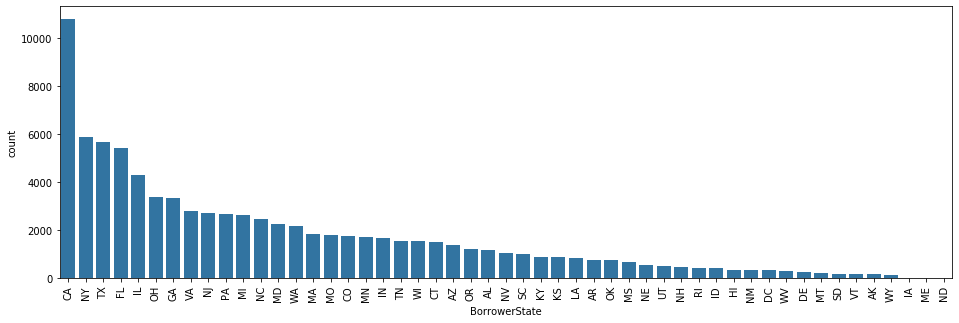

In [28]:
# plot BorrowerState
plt.figure(figsize = [16,5])
order = df['BorrowerState'].value_counts().index
sb.countplot(data = df, x = 'BorrowerState', color = color, order = order)
plt.xticks(rotation = 90);

The largest group of Prosper borrowers is from California, followed by Newyork and Texas.

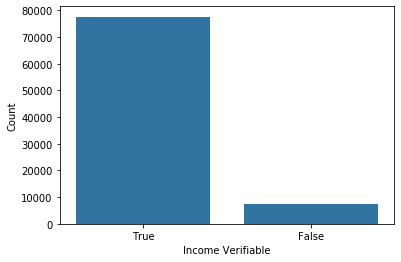

In [29]:
# plot IncomeVerifiable
order = df['IncomeVerifiable'].value_counts().index
sb.countplot(data = df, x = 'IncomeVerifiable', color = color, order = order)
plt.xlabel('Income Verifiable')
plt.ylabel('Count');

The incomes of most borrowers are verified.

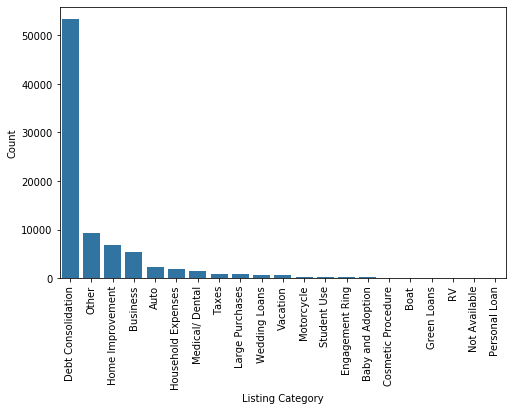

In [30]:
# Create a new catergorical column ListingCat from ListingCategory (numeric) and plot the distribution of the loan types
loan_type_markers = {0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',8:'Baby and Adoption',9:'Boat',10:'Cosmetic Procedure',11:
       'Engagement Ring',12:'Green Loans',13:'Household Expenses',14:'Large Purchases',15:'Medical/ Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

df['ListingCat'] = df['ListingCategory (numeric)'].apply(lambda x: loan_type_markers[x])
df['ListingCat'].astype('category')

plt.figure(figsize = [8,5])
order = df['ListingCat'].value_counts().index
sb.countplot(data = df, x = 'ListingCat', color = color, order = order)

plt.xlabel('Listing Category')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

The most frequent loan category is debt consolidation.

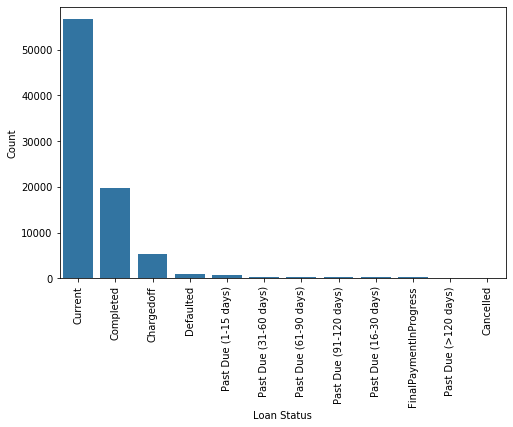

In [31]:
# plot LoanStatus
plt.figure(figsize = [8,5])
order = df['LoanStatus'].value_counts().index
sb.countplot(data = df, x = 'LoanStatus', color = color, order = order)
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

While the majority of the loans are current, there are some loans that have defaulted and were charged off.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I wanted to look at the factors that affected the interest rates offered by Prosper. The BorrowerAPR took on a range of values with two peaks at 0.2 and 0.34. The BorrowerRate had a similar shape but the interest rate was less. I wanted to refrain from selecting one type of interest rate over the other at the very beginning, so I analyzed both. I'll narrow down onto one of them in the later stages of my analysis.

> I didn't need to perform any transformations as the distribution of the interest rate had an acceptable range of values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I was expecting more loans on the high end of the ProsperScore and was surprised to see the number of borrowers who already had an existing Prosper loan. I also expected the distribution for the loan type to be more even, instead of borrowers taking out loans mostly for debt consolidation.


> There were some changes made by Prosper on how the risk and return is measured for loans. To avoid missing data and compare it effectively over time, I choose to look at the data from July 2009 and onwards. I also noticed that the type of loan was given as a number. So I made a new variable (ListingCat) with the loan names, so that the plots can be interpreted easily. Lastly I converted the categorical variables from strings to categorical type for further exploration, and removed outliers.

## Bivariate Exploration

I'll start by looking at the pair-wise correalation between the different loan features,

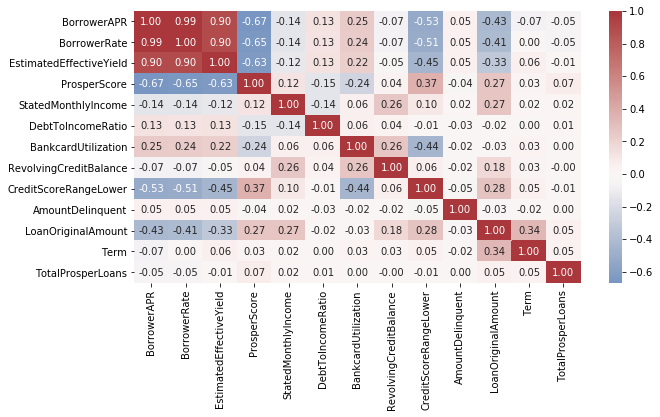

In [32]:
# heatmap to show the correlation between variables
quant_vars = ['BorrowerAPR','BorrowerRate','EstimatedEffectiveYield','ProsperScore','StatedMonthlyIncome','DebtToIncomeRatio','BankcardUtilization','RevolvingCreditBalance','CreditScoreRangeLower','AmountDelinquent','LoanOriginalAmount','Term','TotalProsperLoans']
cat_vars = ['BorrowerState','IncomeVerifiable','ListingCat', 'LoanStatus']
plt.figure(figsize = [10,5])
sb.heatmap(df[quant_vars].corr(), cmap = 'vlag', annot = True, fmt = '.2f', center = 0);

The heat map shows that the loan features are more correalated to the BorrowerAPR than the the BorrowerRate. It is also an annualized rate, which allows better comparision between loans of different terms. From here, I'll be using the BorrowerAPR as my main variable of interest. 

Let's narrow down the variables to focus on the relationships that stand out and plot them using a scatter plot. I'm taking a sample of the data so that the plots are clear and easy to interpret,

In [33]:
# narrow down quant variables of interest by dropping BorrowerRate, EstimatedEffectiveYield, RevolvingCreditBalance, AmountDelinquent, Term and TotalProsperLoans
new_quant_vars = ['BorrowerAPR','ProsperScore','StatedMonthlyIncome','DebtToIncomeRatio','BankcardUtilization','CreditScoreRangeLower','LoanOriginalAmount']

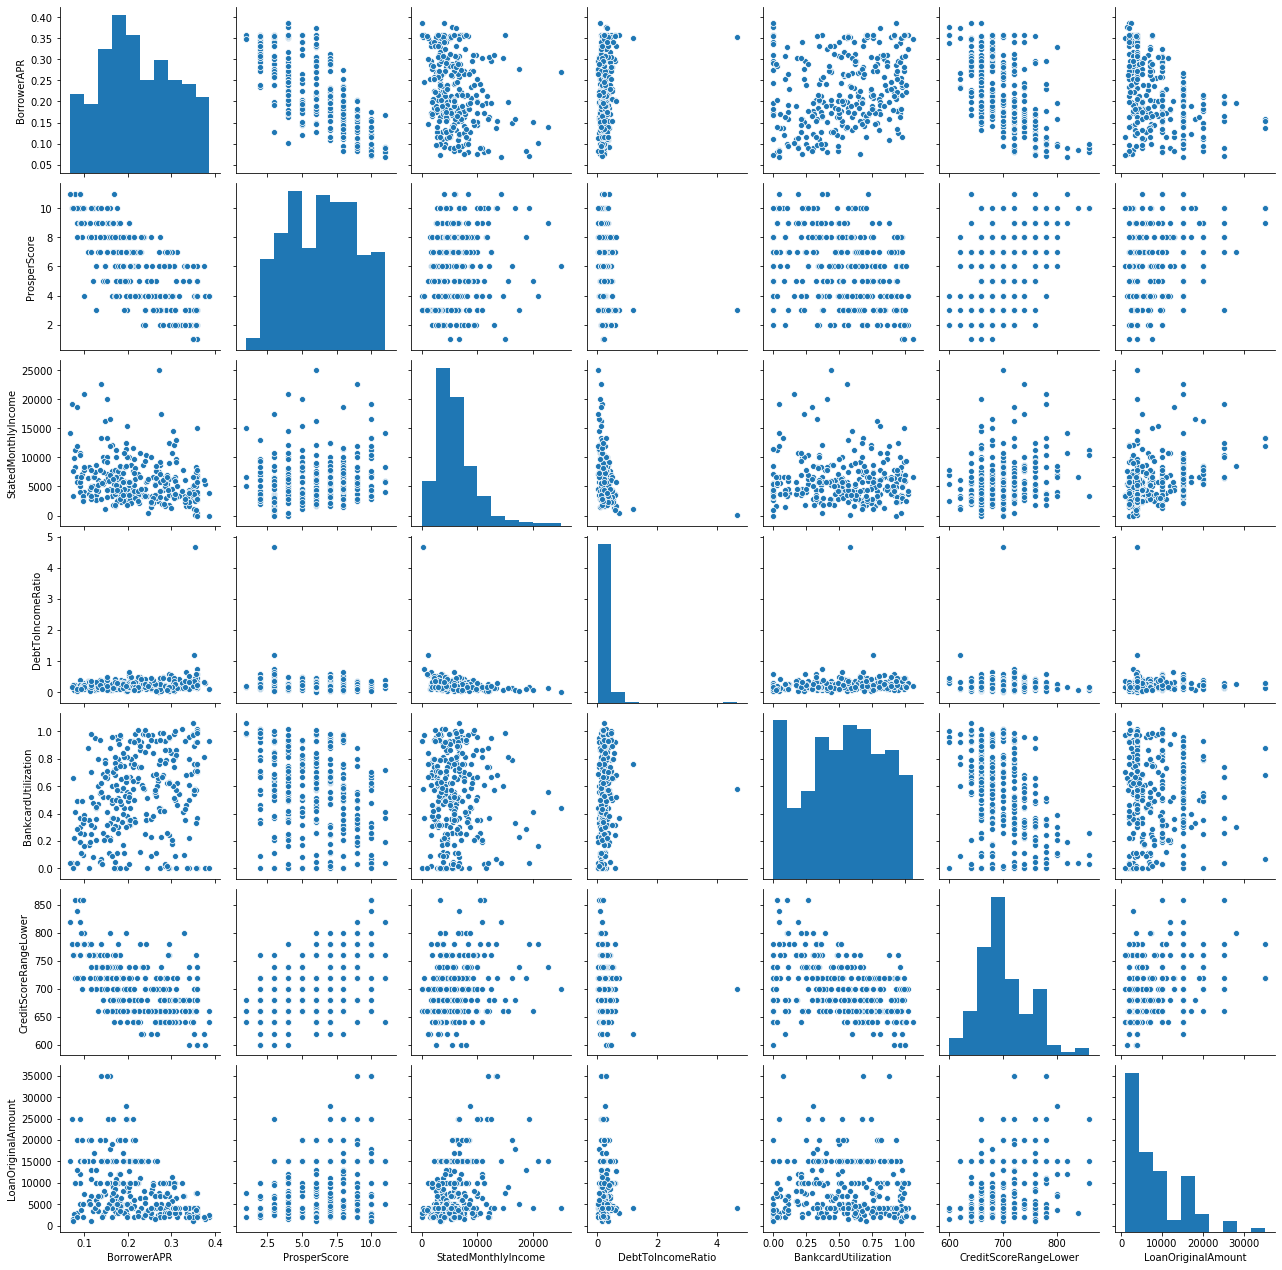

In [34]:
# plotmatrix: sample 300 loans
df_subset = df.sample(n = 300, random_state = 42)
sb.pairplot(data = df_subset, vars = new_quant_vars);

Let's zoom in on the plots,

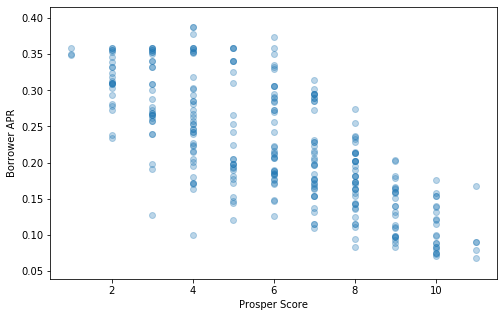

In [35]:
# relationship between BorrowerAPR and ProsperScore using scatter plot
plt.figure(figsize = [8,5])
plt.scatter(data = df_subset, x = 'ProsperScore', y = 'BorrowerAPR', alpha = '0.3')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.show()

The ProsperScore has the highest correlation with the BorrowerAPR. The BorrowerAPR is lower for loans that are considered safer and have a high ProsperScore. However as the ProseperScore is a discrete variable, the are quite a bit of overlap in the points even with the transparency.

A strip plot slightly seperates the points by allowing jitter in both directions,

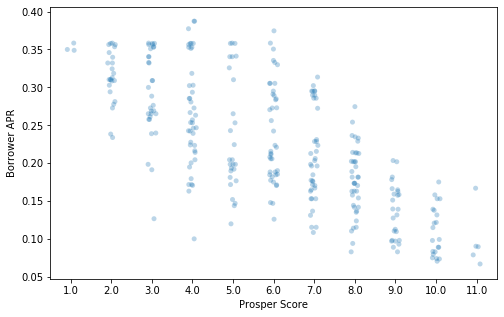

In [36]:
# relationship between BorrowerAPR and ProsperScore using strip plot
plt.figure(figsize = [8,5])
sb.stripplot(data = df_subset, x = 'ProsperScore', y = 'BorrowerAPR', color = color, alpha = 0.3)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.show()

Let's explore with some other plot types,

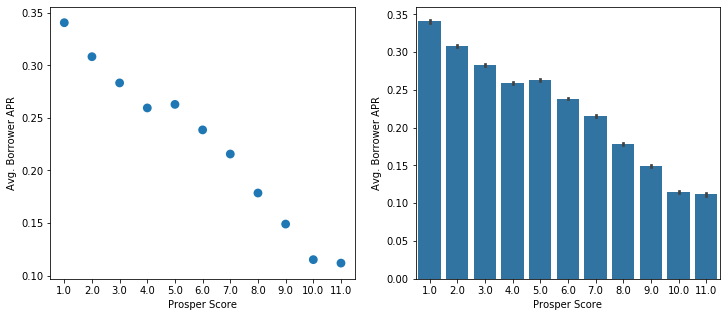

In [37]:
# relationship between BorrowerAPR and ProsperScore using point plot and adapted bar chart to show avg. Borrower APR
plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
sb.pointplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', linestyles = '')
plt.xlabel('Prosper Score')
plt.ylabel('Avg. Borrower APR')
plt.subplot(1,2,2)
sb.barplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', color = color)
plt.xlabel('Prosper Score')
plt.ylabel('Avg. Borrower APR')
plt.show()

The line for Avg. BorrowerAPR is downward sloping with a slight uptick for loans that have a ProsperScore of 5.0.

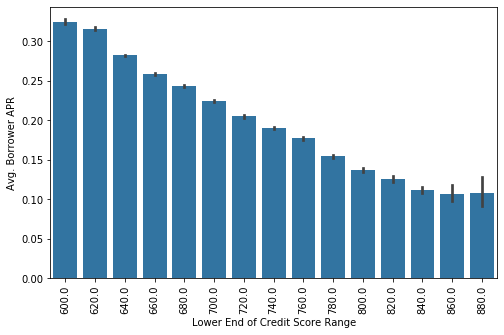

In [38]:
# relationship between BorrowerAPR and CreditScoreRangeLower to show avg. Borrower APR
plt.figure(figsize = [8,5])
sb.barplot(data = df, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', color = color)
plt.xlabel('Lower End of Credit Score Range')
plt.ylabel('Avg. Borrower APR')
plt.xticks(rotation = 90)
plt.show()

The Avg. BorrowerAPR is lower for customers that have a higher credit score but this seems to be less true in the highest credit score segments.

LoanOriginalAmount is a continuous variable so a line or a bar plot is not ideal. We can plot it using seaborn's regplot, which allows transparency, jitter, and draws a regression line,

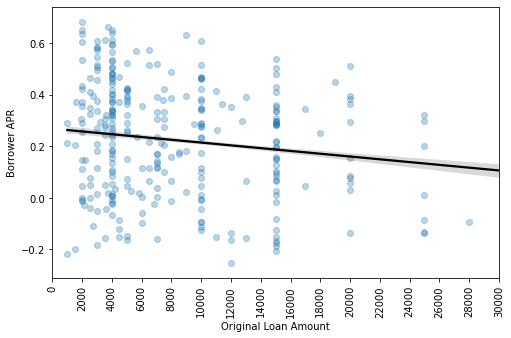

In [39]:
# relationship between BorrowerAPR and LoanOriginalAmount using reg plot
plt.figure(figsize = [8,5])
sb.regplot(data = df_subset, x = 'LoanOriginalAmount', y = 'BorrowerAPR', x_jitter = 0.35, y_jitter = 0.35, scatter_kws = {'alpha':0.3}, line_kws = {'color':'black'})
plt.xlabel('Original Loan Amount')
plt.ylabel('Borrower APR')
ticksize = 2000
ticks = np.arange(0, df['LoanOriginalAmount'].max()+ticksize, ticksize)
plt.xticks(ticks, rotation = 90)
plt.xlim(0,30000)
plt.show()

From the univariate analysis earlier, I noticed that were spikes in the frequency associated with standard loan amounts. Let's look at how the BorrowerAPR differs across these loan amount groups,

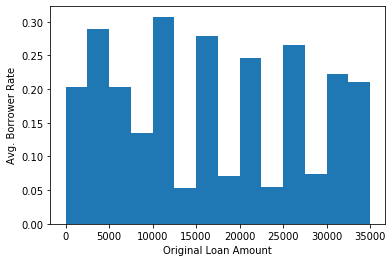

In [40]:
# relationship between BorrowerAPR and LoanOriginalAmount using an adapted histogram to show avg. Borrower Rate

# bin size and bins edges
binsize = 2500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

# allocate BorrowerAPR into the appropriate bins
bin_index = pd.cut(df['LoanOriginalAmount'], bins, labels = False, include_lowest = True).astype(int)

# group the points according to their appropriate bins and count the number of points in each bin
pts_per_bin = df.groupby(bin_index).size()

# print the groupby object
# for key, value in gb:
#    print(gb.get_group(key), '\n')

# calculate the new weights parameter so that avg. BorrowerRate can be shown on the y-axis
custom_weight = df['BorrowerAPR']/ pts_per_bin[bin_index].values

# plot the adapted histogram
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins, weights = custom_weight)
plt.xlabel('Original Loan Amount')
plt.ylabel('Avg. Borrower Rate')
plt.show()

The avg. BorrowerAPR is much higher for these standard loan amounts. There might be other variables which are inflating the BorrowerAPR for these loans. It might be worthwhile to look into this in later parts of the analysis.

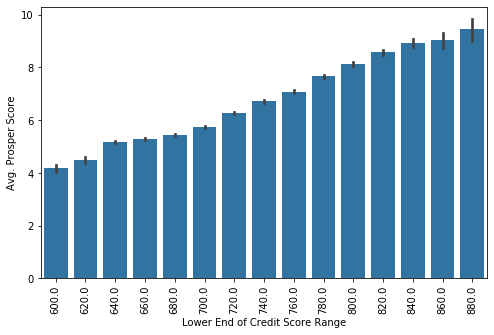

In [41]:
# relationship between ProsperScore and CreditScoreRangeLower to using adapted bar chart to show avg. Prosper Score
plt.figure(figsize = [8,5])
sb.barplot(data = df, x = 'CreditScoreRangeLower', y = 'ProsperScore', color = color)
plt.xlabel('Lower End of Credit Score Range')
plt.ylabel('Avg. Prosper Score')
plt.xticks(rotation = 90)
plt.show()

The risk rating of the loan has a positive relationship with the borrower's credit score. A higher credit score is associated with a borrower having a better chance of paying back the loan, which makes the loan less risky for Prosper. 

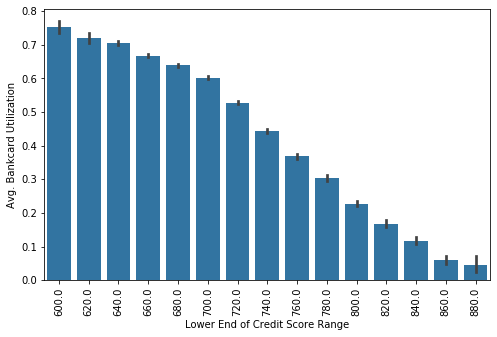

In [42]:
# relationship between BankcardUtilization and CreditScoreRangeLower
plt.figure(figsize = [8,5])
sb.barplot(data = df, x = 'CreditScoreRangeLower', y = 'BankcardUtilization', color = color)
plt.xlabel('Lower End of Credit Score Range')
plt.ylabel('Avg. Bankcard Utilization')
plt.xticks(rotation = 90)
plt.show()

Borrowers with a lower credit score are more likely to have a greater credit card balance.

Next, I want to look at the relationship between the BorrowerAPR and the categorical variables,

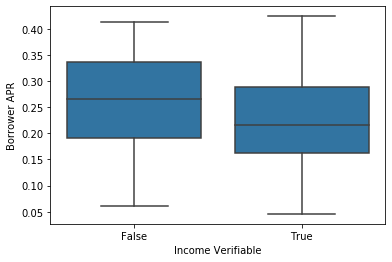

In [43]:
# relationship between BorrowerAPR and IncomeVerifiable
sb.boxplot(data = df, x = 'IncomeVerifiable', y = 'BorrowerAPR', color = color)
plt.ylabel('Borrower APR')
plt.xlabel('Income Verifiable')
plt.show()

Borrowers with verfied incomes are usually able to get a reduced interest rate from Prosper but the rate varies over a larger range.

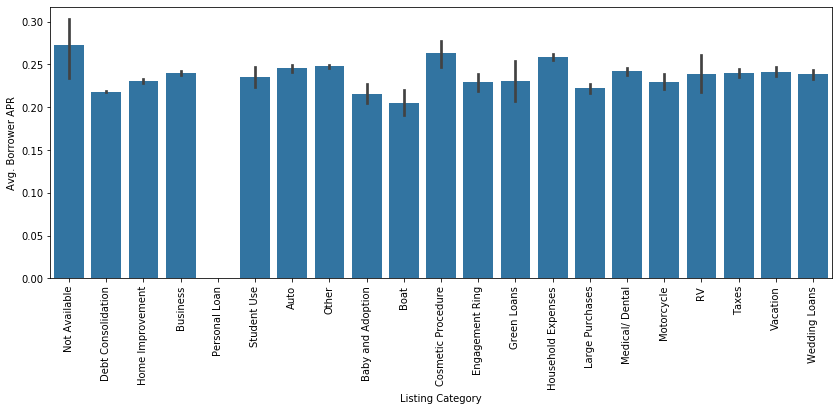

In [44]:
# relationship between BorrowerAPR and ListingCat using adapted bar chart to show avg. Borrower APR
plt.figure(figsize = [14,5])
sb.barplot(data = df, x = 'ListingCat', y = 'BorrowerAPR', color = color)
plt.ylabel('Avg. Borrower APR')
plt.xlabel('Listing Category')
plt.xticks(rotation = 90)
plt.show()

The interest rate is highest for loans which have an undisclosed loan type and lowest for loans taken out for boat purchases. I'm curious if the ProsperScore for loans with an undisclosed type is also lower,

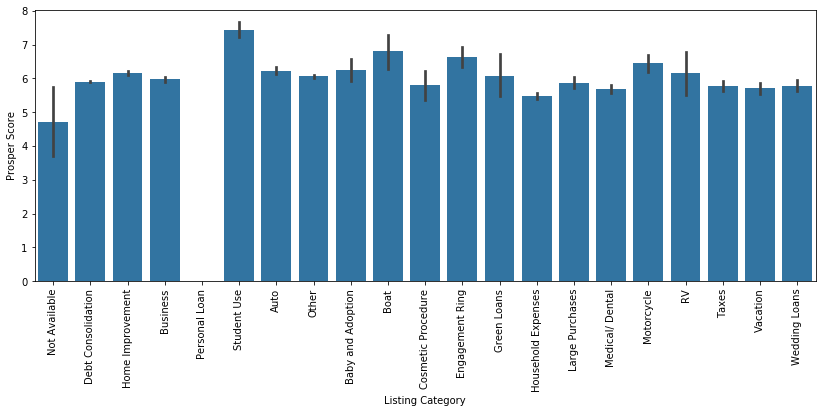

In [45]:
# relationship between ProsperScore and ListingCat using adapted bar chart to show Avg. Prosper Score
plt.figure(figsize = [14,5])
sb.barplot(data = df, x = 'ListingCat', y = 'ProsperScore', color = color)
plt.ylabel('Prosper Score')
plt.xlabel('Listing Category')
plt.xticks(rotation = 90)
plt.show()

The ProsperScore is lowest for loans with an undisclosed loan type, which matches my original assumption.

While I know that most of the loans are current, let's see if the interest rate is different for loans that defaulted or were charged off,

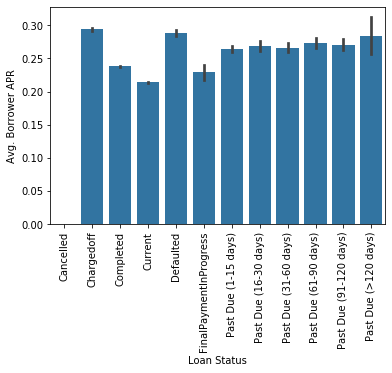

In [46]:
# relationship between BorrowerAPR and LoanStatus using adapted bar chart to show Avg. Borrower APR
sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', color = color)
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Avg. Borrower APR')
plt.show()

The interest rate for loans that have defaulted or were charged off are the highest.

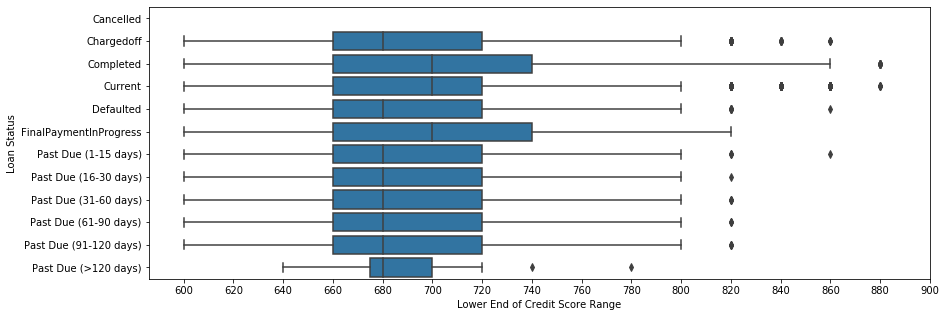

In [47]:
# relationship between CreditScoreRangeLower and LoanStatus
plt.figure(figsize = [14,5])
sb.boxplot(data = df, y = 'LoanStatus', x = 'CreditScoreRangeLower', color = color)
plt.xlabel('Lower End of Credit Score Range')
ticksize = 20
plt.xticks(np.arange(600,900+ticksize,ticksize))
plt.ylabel('Loan Status')
plt.show()

Lastly, I want to look at the relationship between the type of loan and its loan status. More specifically, I want to compare the type of loans that have a completed loan status with the type of loans that have been charged off. A clustered bar chart is the best plot type for this analysis as I'm comparing a categorical variable to another catergorical variable,

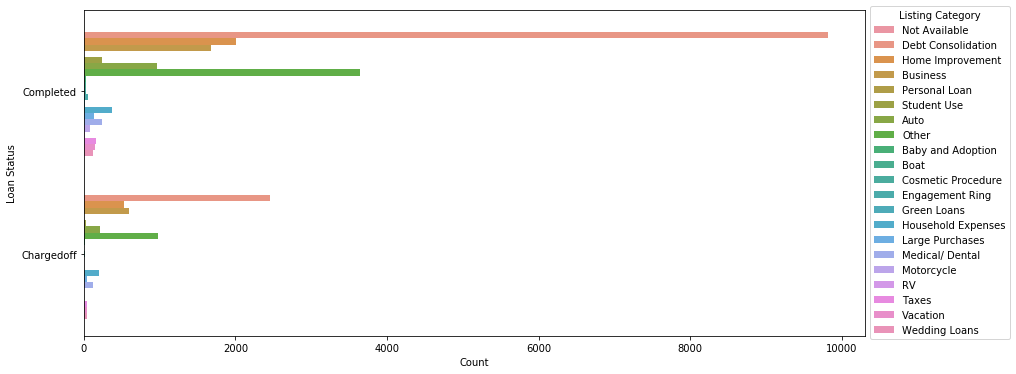

In [48]:
# relationship between ListingCat and LoanStatus

# keep only the completed and defaulted loans
df2 = df[(df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Chargedoff')]

# plot horizontal clustered bar chart
plt.figure(figsize = [14,6])
sb.countplot(data = df2, y = 'LoanStatus', hue = 'ListingCat', order = ['Completed','Chargedoff'])
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.legend(loc = 'center left', title = 'Listing Category', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.show()

I was curious if there were certain types of loans that had a higher chance of getting charged off but the proportion seems to be the same.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I narrowed down my main variable of interest to the BorrowerAPR as it was more correlated to the loan features than the BorrowerRate. 

> The risk rating of the loan had the highest correalation to this interest rate. The more risky the loan, the higher was the BorrowerAPR. The interest rate also had strong negative relationships with the borrowers' credit score and the loan amount. 

> For the categorical variables, the interest rate was less for the borrowers whos incomes were verified and greater for the borrowers who's loan type were not available. The interest rate was the highest for loans that have either defaulted or were charged off.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I noticed a strong positive relationship between the risk rating and the credit score and a strong negative relatinship between the bankcard utilization and the credit score. The risk rating was the highest for boat purchases and the lowest for loans with an undisclosed loan type.

## Multivariate Exploration

In this part of the analysis, I want to focus on how the relationship between the interest rate and the risk rating varies between different loan types and loan statuses. I also want to take a deeper look at the relationship between the interest rate and the loan amount from the previous section.

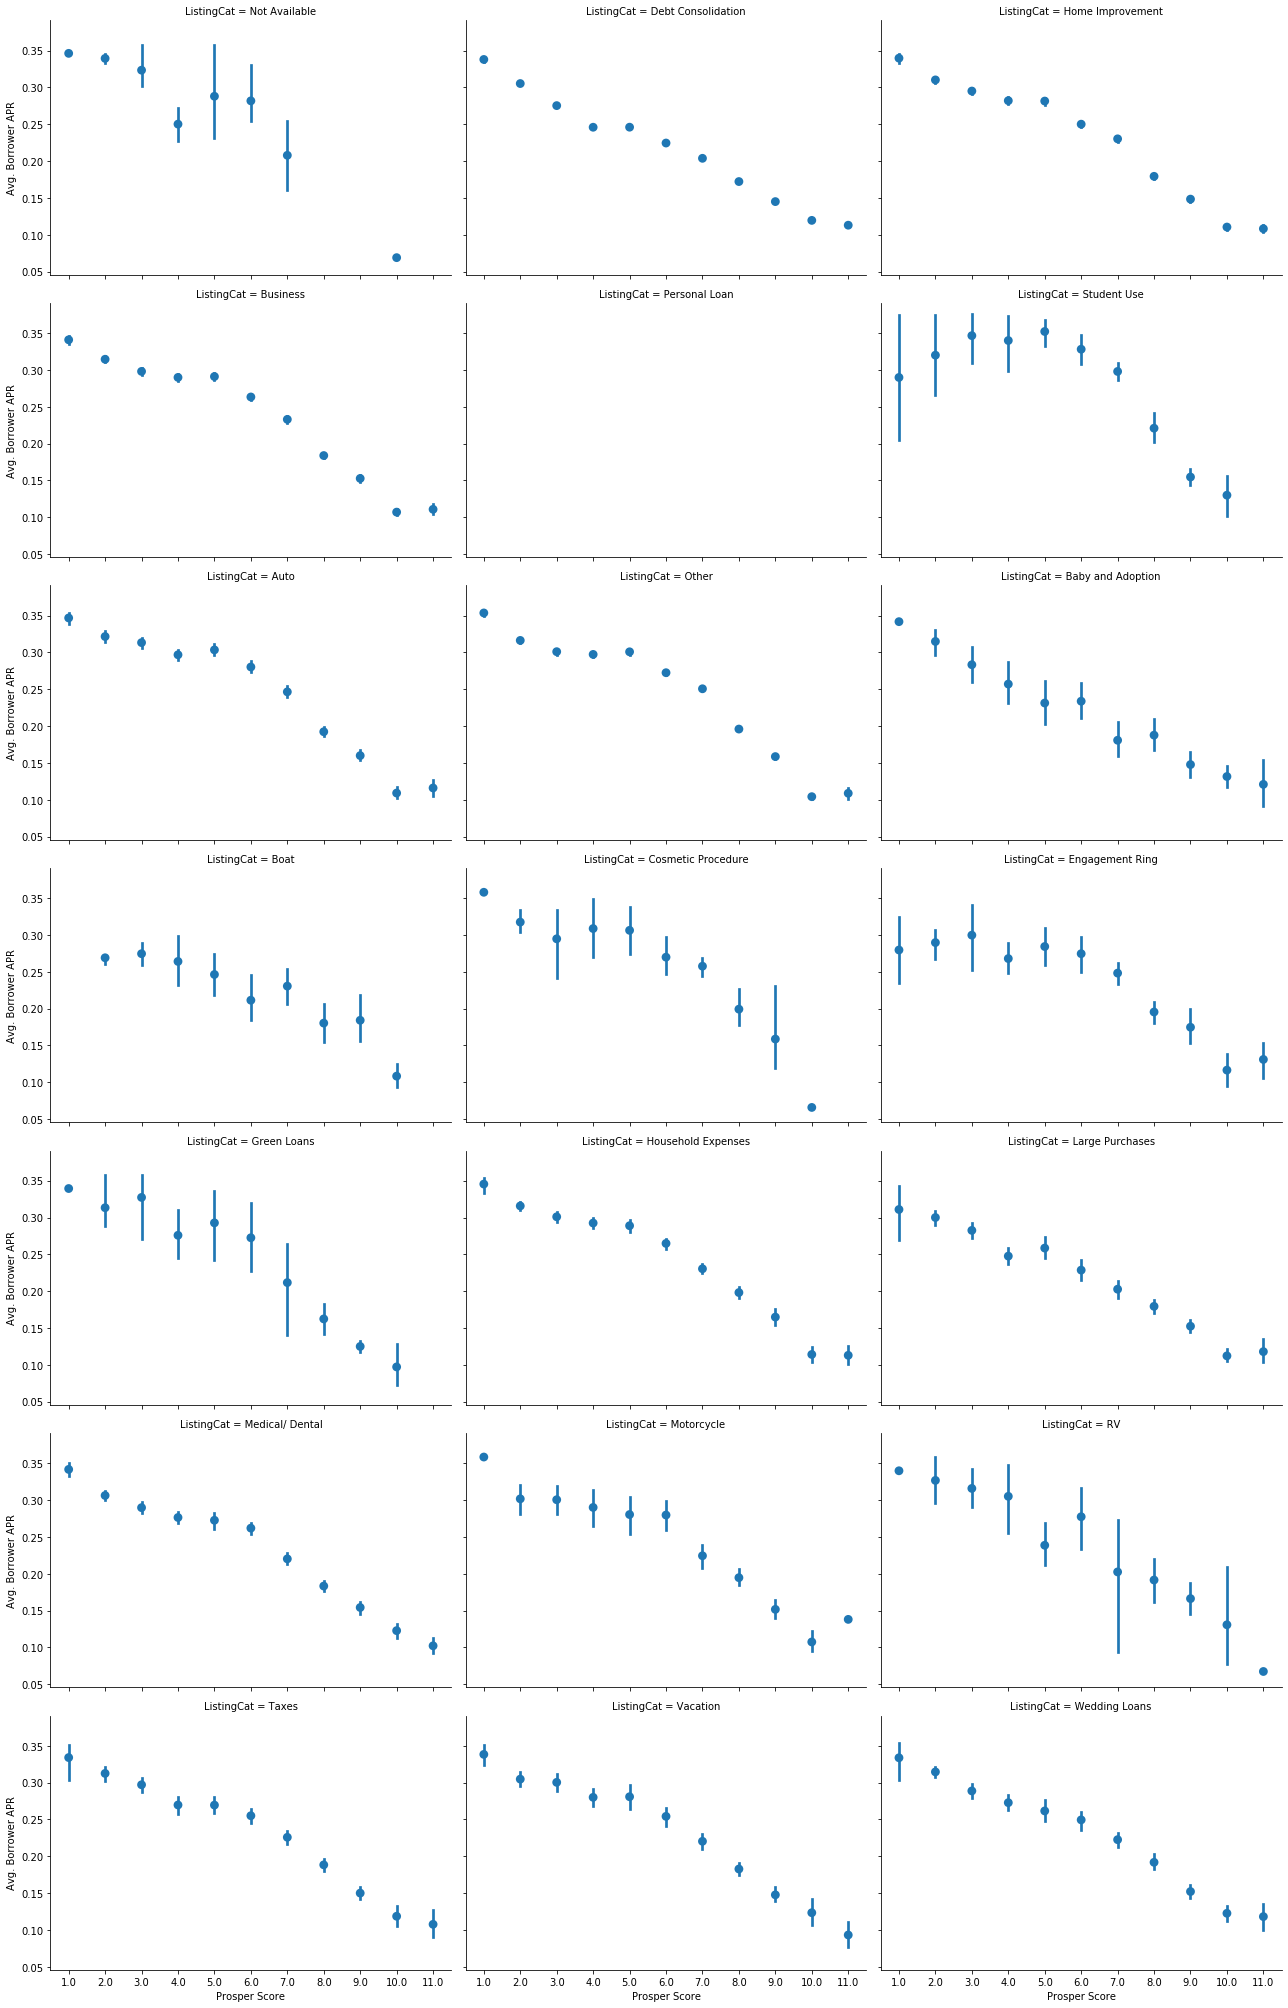

In [57]:
# relationship between BorrowerAPR and ProsperScore faceted by ListingCat using point plot
    
g = sb.FacetGrid(data = df, col = 'ListingCat', col_wrap = 3, height = 4, aspect = 1.5, margin_titles = True)
g.map(sb.pointplot, 'ProsperScore', 'BorrowerAPR', linestyles = '', order = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0])
g.set_xlabels('Prosper Score')
g.set_ylabels('Avg. Borrower APR')
plt.show()

The relationship between the interest rate and the risk rating is negative but varies between different loan types.

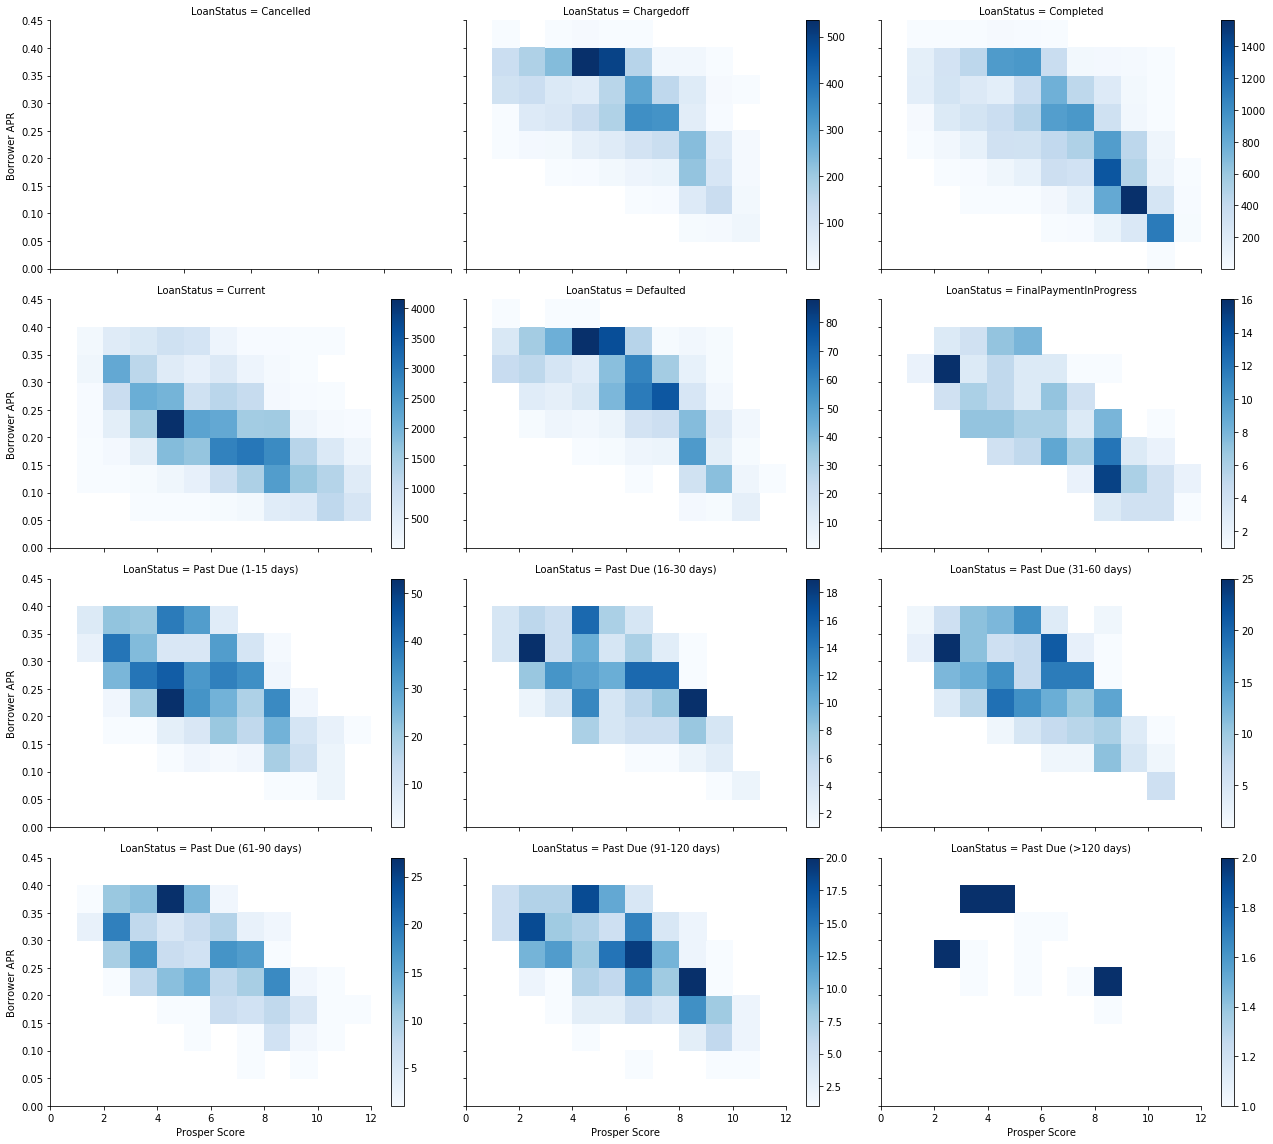

In [51]:
# relationship between BorrowerAPR and ProsperScore faceted by LoanStatus using heatmap

# sb.FacetGrid.map() can only accept a plotting function that takes color as a kwarg. so custom function is needed to call matplotlib's hist2d function
def hist2dgrid(x, y, color, **kwargs):
    binsize_x = 1
    bins_x = np.arange(0, df['ProsperScore'].max()+binsize_x+1, binsize_x)
    binsize_y = 0.05
    bins_y = np.arange(0, df['BorrowerAPR'].max()+binsize_y, binsize_y)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = color, cmin = 0.5)
    plt.colorbar()
    
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 3, height = 4, aspect = 1.5, margin_titles = True)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'Blues')
g.set_xlabels('Prosper Score')
g.set_ylabels('Borrower APR')
plt.show()

Most of the loans that were completed had low risk but yielded a low interest rate. The largest proportion of loans that defaulted or were charged off had moderate risk but a very high interest rate.

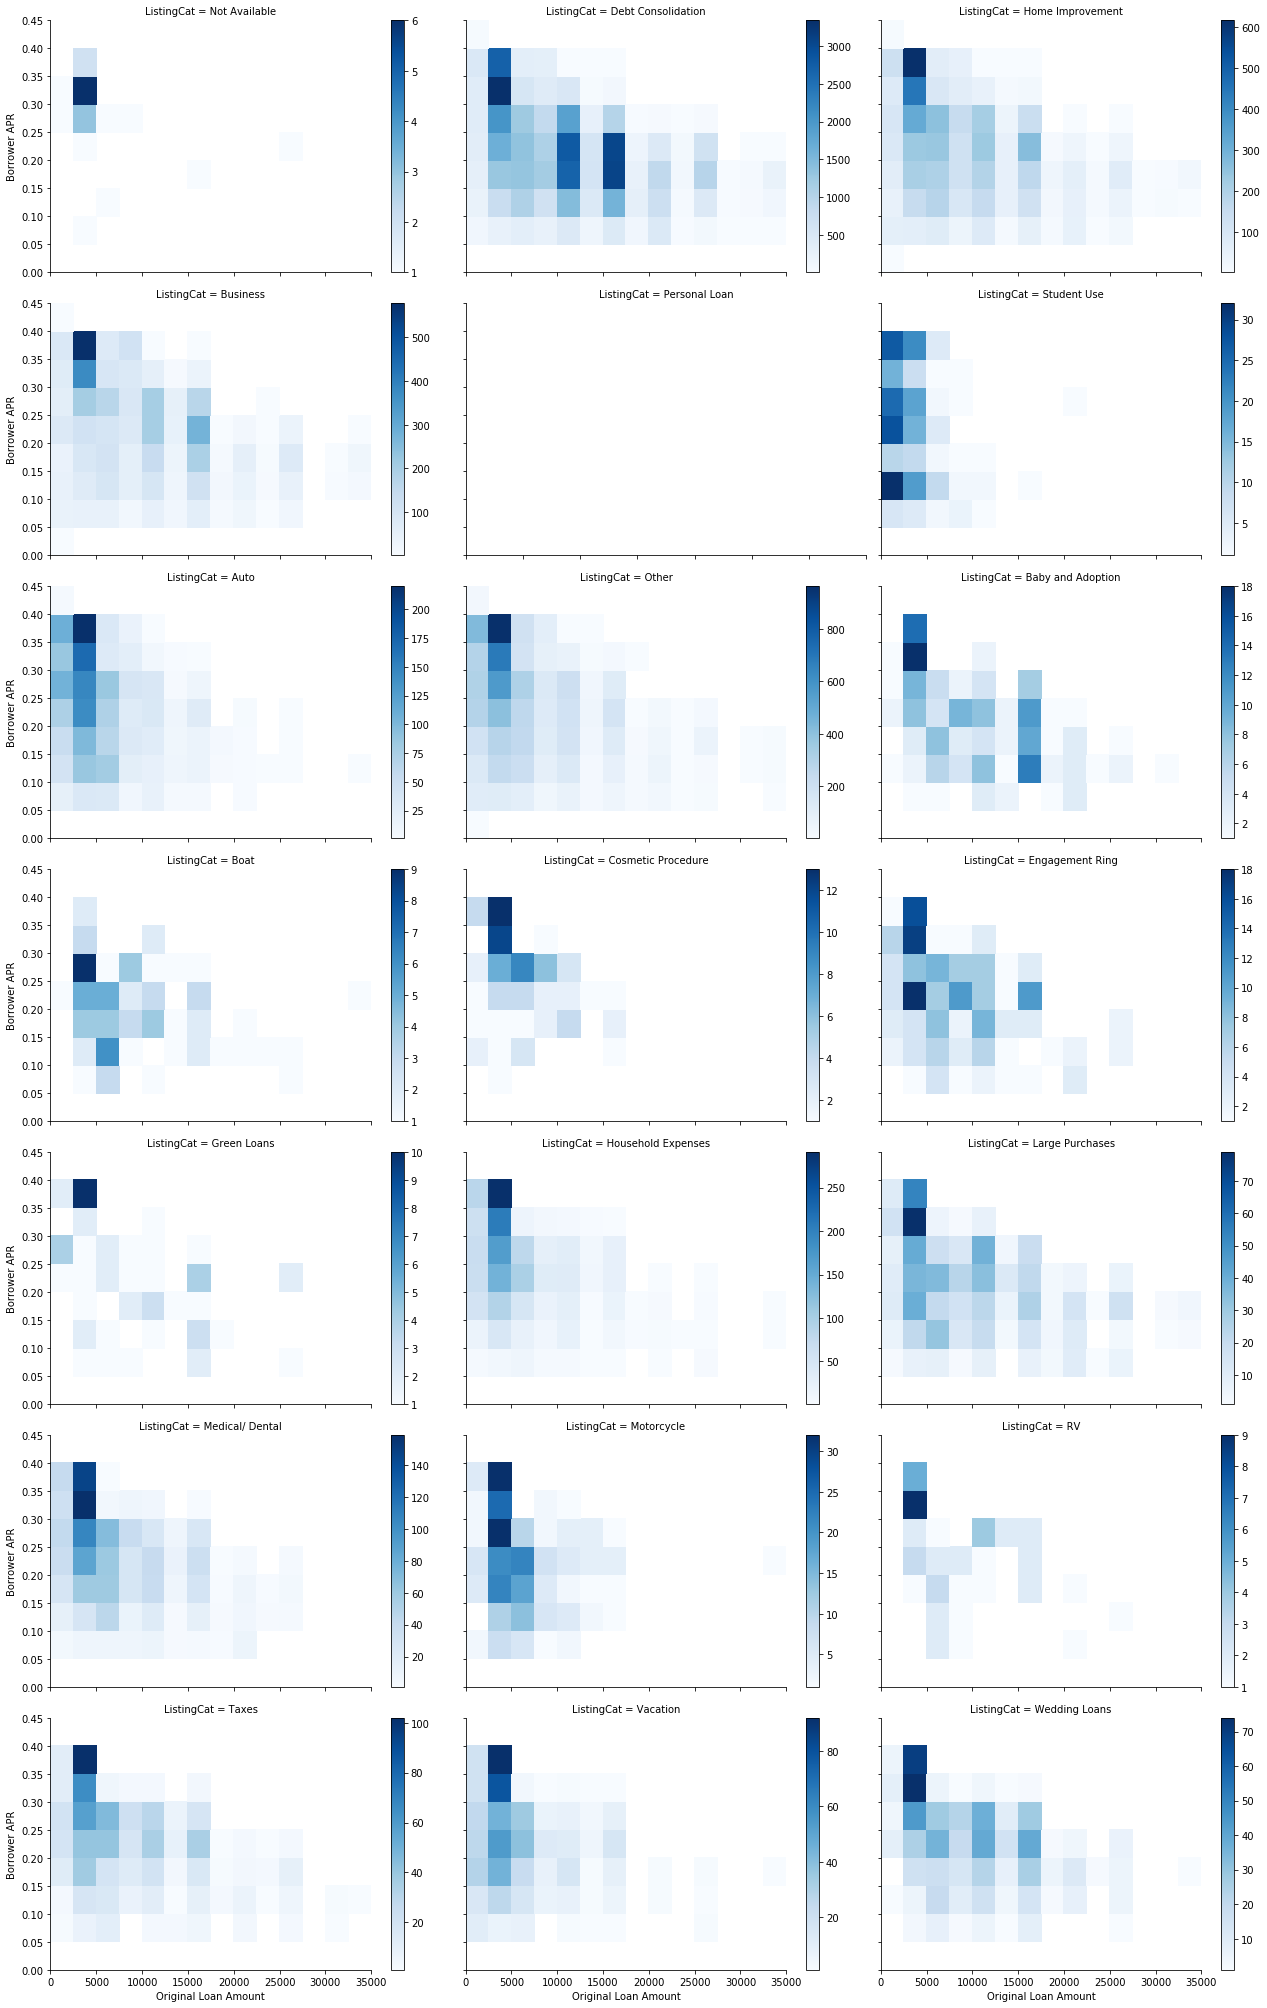

In [52]:
# relationship between BorrowerAPR and LoanOriginalAmount faceted by ListingCat using heatmap

# sb.FacetGrid.map() can only accept a plotting function that takes color as a kwarg. so custom function is needed to call matplotlib's hist2d function
def hist2dgrid(x, y, color, **kwargs):
    binsize_x = 2500
    bins_x = np.arange(0, df['LoanOriginalAmount'].max()+binsize_x, binsize_x)
    binsize_y = 0.05
    bins_y = np.arange(0, df['BorrowerAPR'].max()+binsize_y, binsize_y)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = color, cmin = 0.5)
    plt.colorbar()
    
g = sb.FacetGrid(data = df, col = 'ListingCat', col_wrap = 3, height = 4, aspect = 1.5, margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'Blues')
g.set_xlabels('Original Loan Amount')
g.set_ylabels('Borrower APR')
plt.show()

Most of the loans are of low amount and have high interest rates. But for debt consolidation loans, there are patches of loans in the moderate amount - moderate interest rate regions.

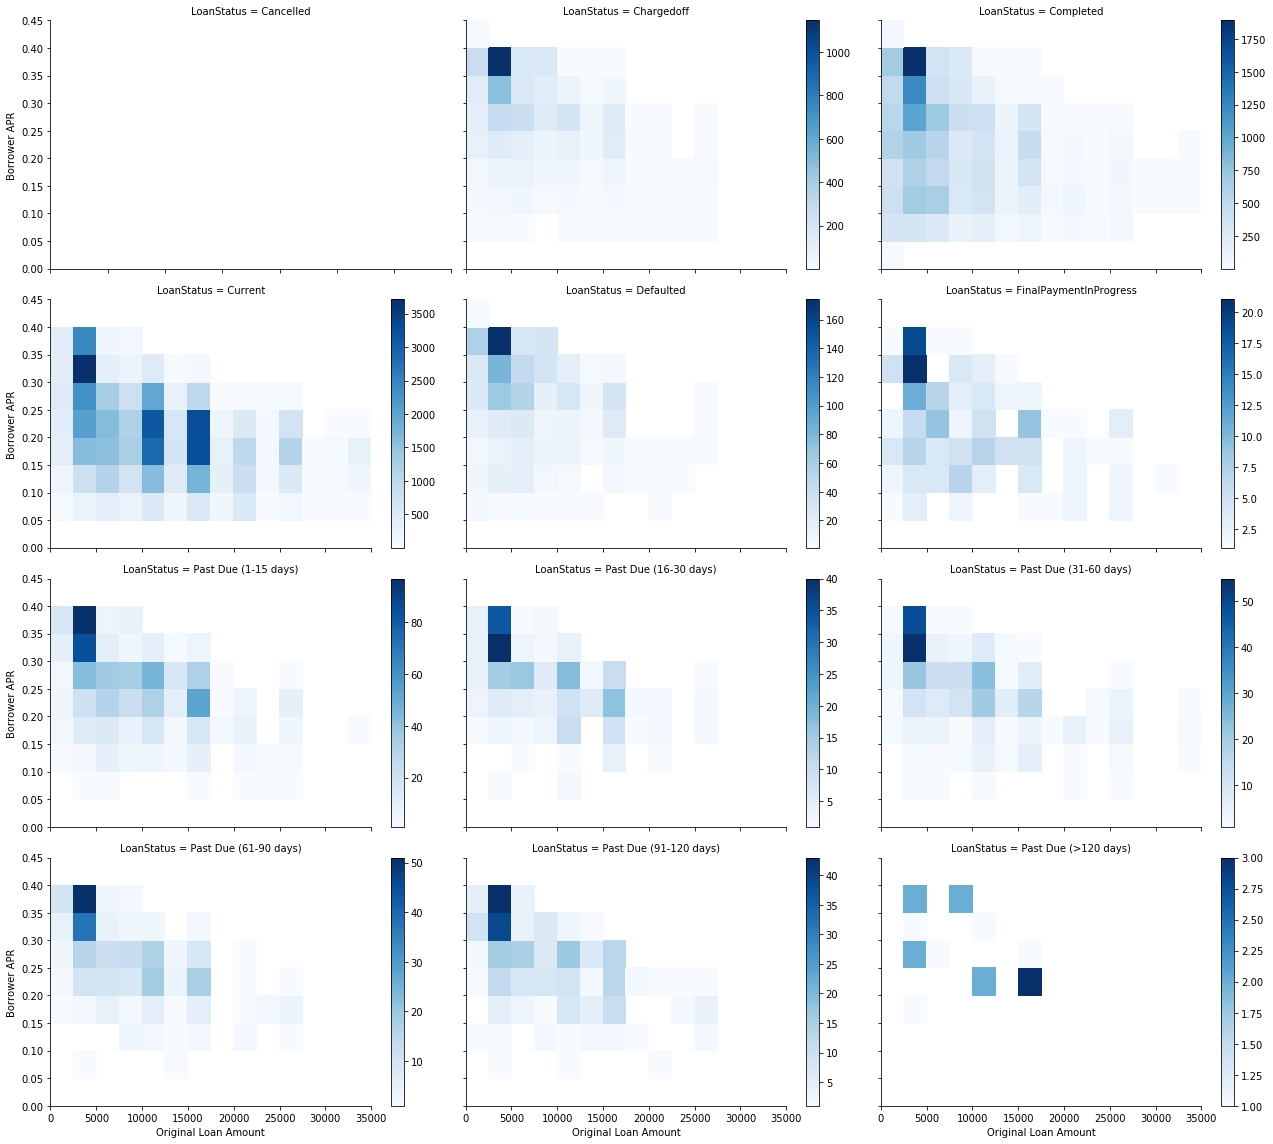

In [53]:
# relationship between BorrowerAPR and LoanOriginalAmount faceted by LoanStatus using heatmap

# sb.FacetGrid.map() can only accept a plotting function that takes color as a kwarg. so custom function is needed to call matplotlib's hist2d function
def hist2dgrid(x, y, color, **kwargs):
    binsize_x = 2500
    bins_x = np.arange(0, df['LoanOriginalAmount'].max()+binsize_x, binsize_x)
    binsize_y = 0.05
    bins_y = np.arange(0, df['BorrowerAPR'].max()+binsize_y, binsize_y)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = color, cmin = 0.5)
    plt.colorbar()
    
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 3, height = 4, aspect = 1.5, margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'Blues')
g.set_xlabels('Original Loan Amount')
g.set_ylabels('Borrower APR')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  While the relationship between the interest rate and the risk score is negative, the strength of the correlation varies for different loan types. For debt consolidation loans, which is the most frequent loan type, the interest rate is lower for most risk scores compared to other loan types. However for student loans, the interest rate has a peak in the middle instead of having a linear relationship.

> The majority of completed loans are less risky and have low interest rates. But loans that have defaulted or were charged off have moderate risk but high interest rates.

> The relationship between the interest rate and the loan amount is more consistent over different loan types. Most of the loans are concentrated in the low loan amount - high interest rate region, but for debt consolidation loans, there is a large proportion in the moderate loan amount - moderate interest rate region as well.

> From the bi-variate analysis, I wanted to explore if the spikes in the interest rates at standard loan amounts were due to a specific loan type. However, the heatmap of the interest rate and the loan amount shows patches of lighter regions in between darker ones for most loan types, so this is not the case.

> The interest rate is affected by the risk rating, which in turn is affected by the loan type. This shows that there is collinearity between the features.

### Were there any interesting or surprising interactions between features?

> I was expecting the majority of defaulted or charged off loans to have a low risk score. But these loans were considered moderate risk by Prosper and had a very high interest rate, which seemed to be off from the negative relationship between the interest rate and the risk rating.